In [42]:
import pandas as pd

In [43]:
df=pd.read_csv("C:/Users/acer/Dropbox/PC/Downloads/admission_data.csv")
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

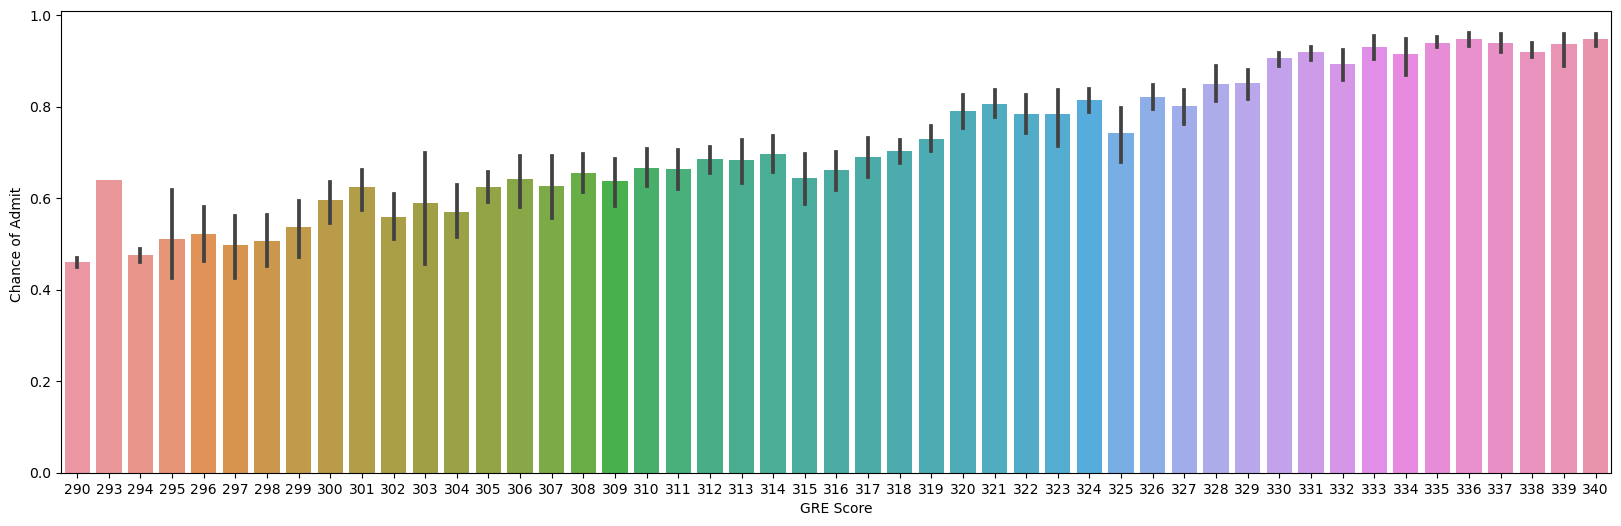

In [45]:
plt.figure(figsize=(20,6))
sns.barplot(x=df['GRE Score'],y=df['Chance of Admit '])

In [46]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

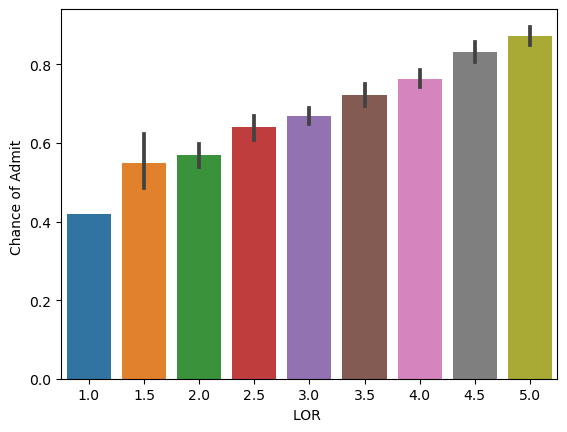

In [47]:
sns.barplot(x=df['LOR '],y=df['Chance of Admit '])

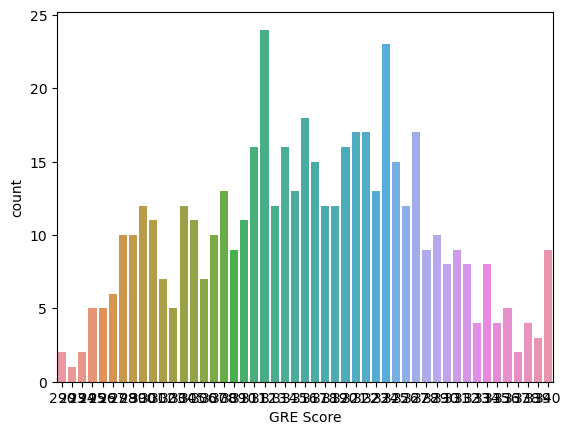

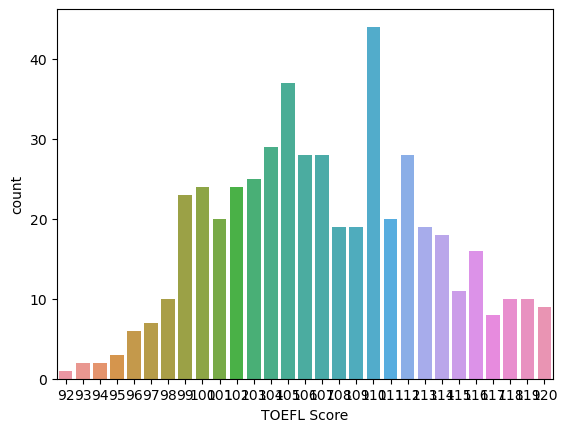

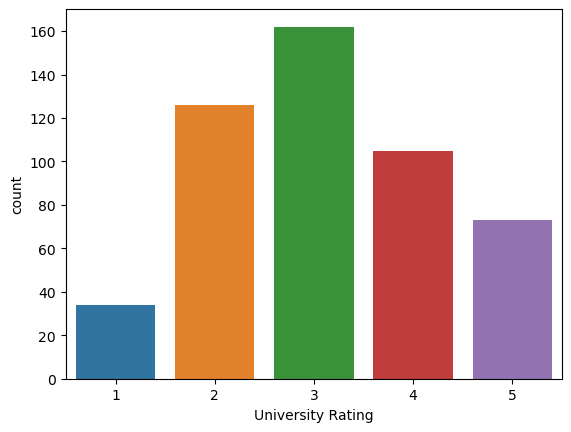

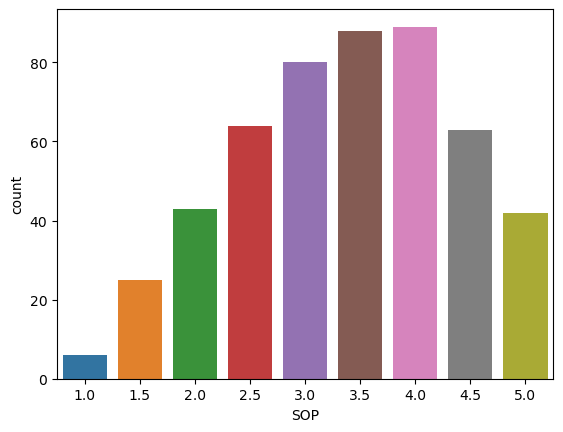

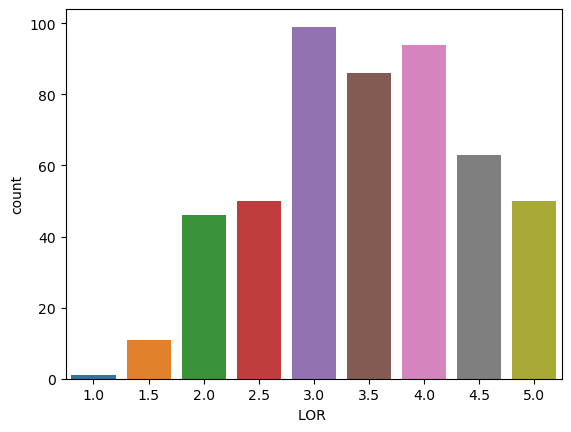

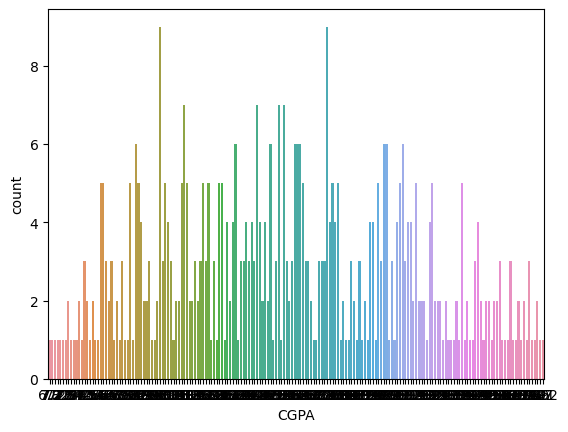

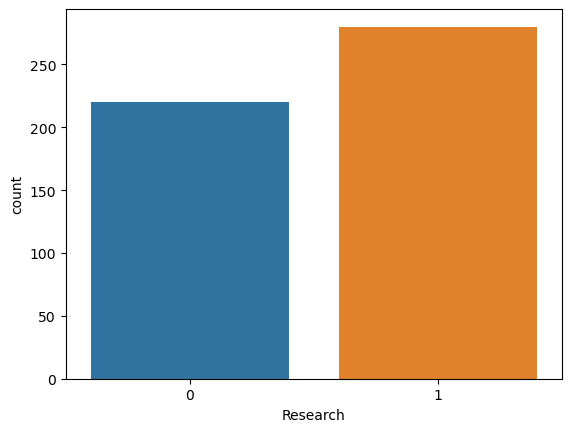

In [48]:
f1 = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
for i,cols in enumerate(f1):
    plt.figure(i)
    sns.countplot(x=df[cols],data=df)

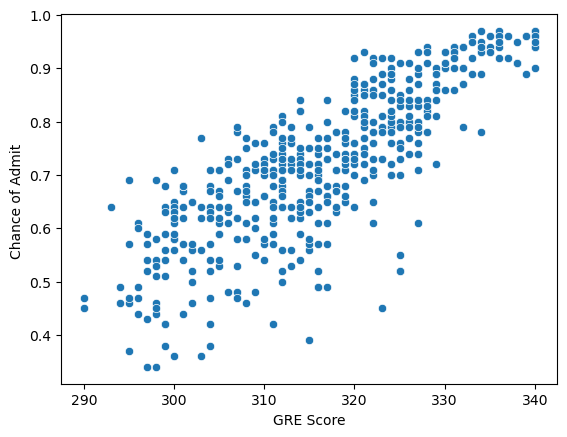

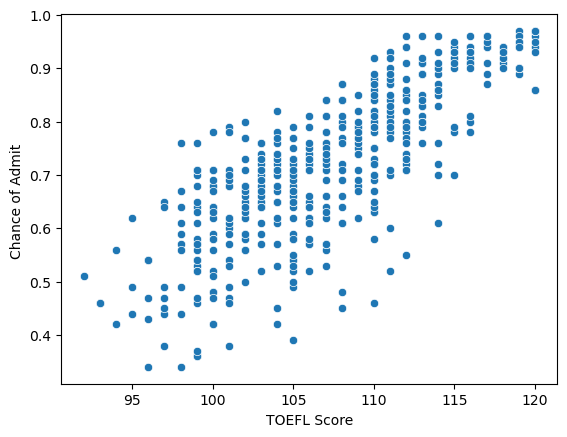

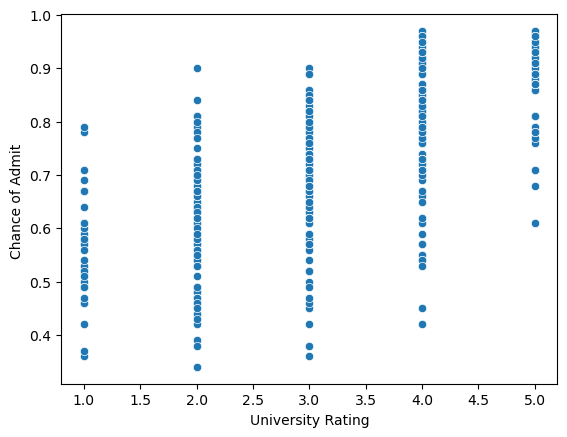

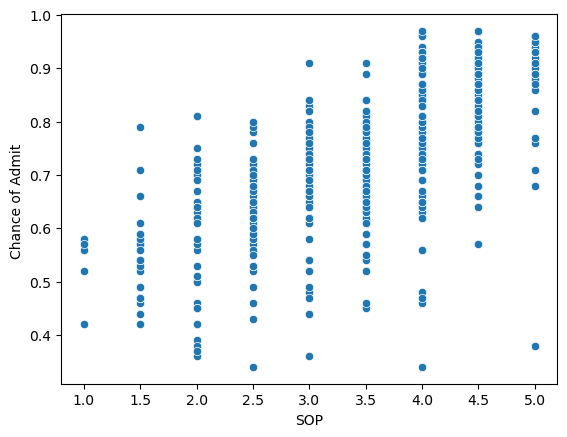

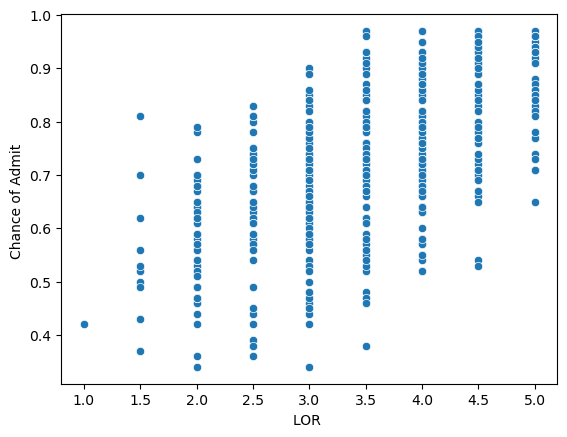

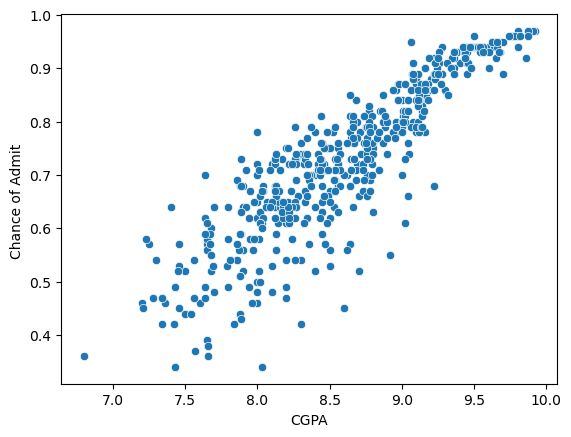

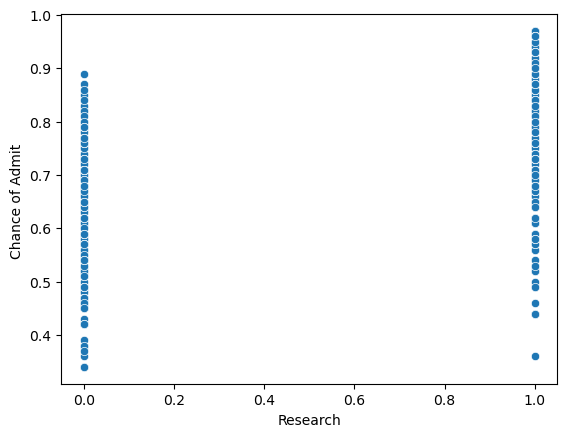

In [49]:
for i,cols in enumerate(f1):
    plt.figure(i)
    sns.scatterplot(x=df[cols],y=df['Chance of Admit '])

<AxesSubplot:>

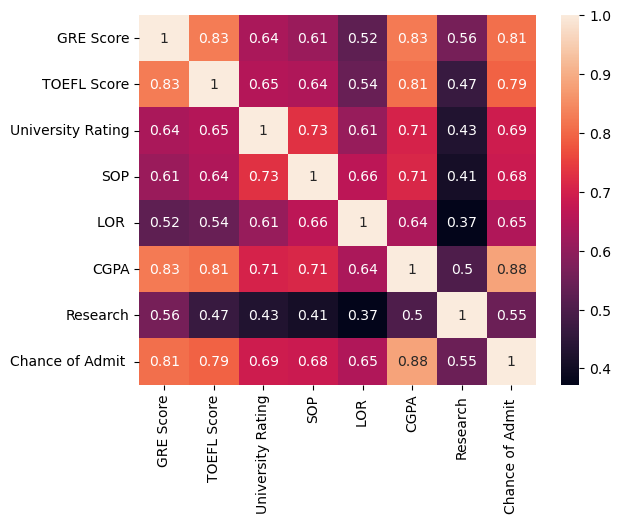

In [50]:
f2 = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']
sns.heatmap(df[f2].corr(),annot=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [52]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [53]:
target = df['Chance of Admit ']
target

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [57]:
feature = df.drop(['Chance of Admit '],axis='columns')
feature

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [58]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=20)

In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model_params={
'linear_regression':{
'model': LinearRegression(),
'params': {}
},
'ridge':{
'model': Ridge(),
'params':{
'alpha':[0.01,0.1,1,10]
}
},
'lasso':{
'model': Lasso(),
'params':{
'alpha':[0.01,0.1,1,10]
}
},
'elastic_net':{
'model': ElasticNet(),
'params':{
'alpha':[0.01,0.1,1,10],
'l1_ratio':[0.1,0.3,0.5,0.7,0.9]
}
},
'random_forest_regression':{
'model': RandomForestRegressor(),
'params':{
'n_estimators':[1,5,10,100]
}
},
'decision_tree_regression':{
'model': DecisionTreeRegressor(),
'params':{
'criterion':['mse','friedman_mse','mae','poisson'],
'splitter':['best','random']
}
}
}

In [88]:
from sklearn.model_selection import GridSearchCV
scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

C:\Users\acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: 

In [89]:
df_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_scores

,model,best_score,best_params
0,linear_regression,0.826296,{}
1,ridge,0.826334,{'alpha': 1}
2,lasso,0.776439,{'alpha': 0.01}
3,elastic_net,0.824311,"{'alpha': 0.01, 'l1_ratio': 0.1}"
4,random_forest_regression,0.787178,{'n_estimators': 100}
5,decision_tree_regression,0.610669,"{'criterion': 'mae', 'splitter': 'random'}"


In [92]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
Y_pred = ridge.predict(X_test)

In [93]:
Y_pred

array([0.88591568, 0.66342446, 0.94212784, 0.83200153, 0.51582441,
       0.65131182, 0.63722962, 0.88931076, 0.48833208, 0.86010678,
       0.58528745, 0.8072606 , 0.57476557, 0.5468829 , 0.50070589,
       0.79685014, 0.72377001, 0.86259788, 0.55131091, 0.66297552,
       0.71782558, 0.47780257, 0.72597626, 0.80045578, 0.90267721,
       0.64680983, 0.56513118, 0.65649203, 0.93549442, 0.70571625,
       0.69441736, 0.6007402 , 0.81297988, 0.58629325, 0.85687783,
       0.64283702, 0.79972577, 0.53834294, 0.6531593 , 0.66824843,
       0.96074313, 0.82652255, 0.7074162 , 0.76528841, 0.76233338,
       0.72276554, 0.74263941, 0.93119256, 0.8951122 , 0.48086354,
       0.65399429, 0.63702278, 0.73008528, 0.68181244, 0.61545279,
       0.65151354, 0.8310142 , 0.72734389, 0.78295365, 0.78997397,
       0.86851936, 0.75253407, 0.94226725, 0.92843676, 0.69531231,
       0.55680794, 0.86709512, 0.66750751, 0.64614975, 0.70802696,
       0.77802176, 0.84277893, 0.52503442, 0.73921678, 0.72942